In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import re

data = pd.read_csv("Star39552_balanced.csv", sep=",")
data.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1


In [2]:
data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
...,...,...,...,...,...,...,...
39547,5.83,0.17,0.52,0.474,B7Iab,6.982245,0
39548,7.05,18.12,0.92,0.424,F5V,18.340790,1
39549,9.21,3.89,1.46,0.227,A1IV,17.159748,1
39550,9.01,2.13,1.46,1.467,M5III,15.651898,0


In [3]:
print(data.dtypes)

Vmag           float64
Plx            float64
e_Plx          float64
B-V            float64
SpType          object
Amag           float64
TargetClass      int64
dtype: object


In [4]:
replace= {'K([0-9a-zA-Z].*)':'K','F([0-9a-zA-Z].*)':'F','B([0-9a-zA-Z].*)':'B','O([0-9a-zA-Z].*)':'O','A([0-9a-zA-Z].*)':'A','G([0-9a-zA-Z].*)':'G','M([0-9a-zA-Z].*)':'M','C([0-9a-zA-Z].*)':'C'}
data_new= data.replace({"SpType": replace}, regex=True)

In [5]:
data_new

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K,22.502556,1
1,8.26,3.21,1.00,1.130,K,15.792525,0
2,8.27,12.75,1.06,0.596,F,18.797552,1
3,6.54,5.23,0.76,1.189,K,15.132508,0
4,8.52,0.96,0.72,0.173,B,13.431356,1
...,...,...,...,...,...,...,...
39547,5.83,0.17,0.52,0.474,B,6.982245,0
39548,7.05,18.12,0.92,0.424,F,18.340790,1
39549,9.21,3.89,1.46,0.227,A,17.159748,1
39550,9.01,2.13,1.46,1.467,M,15.651898,0


In [6]:
NType = {'K': 0, 'F': 1, 'B': 2, 'O': 3, 'A': 4, 'G': 5, 'M': 6, 'C': 7}
data_new['NumSpType'] = data_new['SpType'].map(NType)
data_new

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass,NumSpType
0,10.00,31.66,6.19,1.213,K,22.502556,1,0.0
1,8.26,3.21,1.00,1.130,K,15.792525,0,0.0
2,8.27,12.75,1.06,0.596,F,18.797552,1,1.0
3,6.54,5.23,0.76,1.189,K,15.132508,0,0.0
4,8.52,0.96,0.72,0.173,B,13.431356,1,2.0
...,...,...,...,...,...,...,...,...
39547,5.83,0.17,0.52,0.474,B,6.982245,0,2.0
39548,7.05,18.12,0.92,0.424,F,18.340790,1,1.0
39549,9.21,3.89,1.46,0.227,A,17.159748,1,4.0
39550,9.01,2.13,1.46,1.467,M,15.651898,0,6.0


In [7]:
Sum_Type = data_new["NumSpType"].value_counts()
Sum_Type

0.0    12423
5.0     7947
1.0     7370
2.0     5203
4.0     4546
6.0     1893
3.0      108
7.0       51
Name: NumSpType, dtype: int64

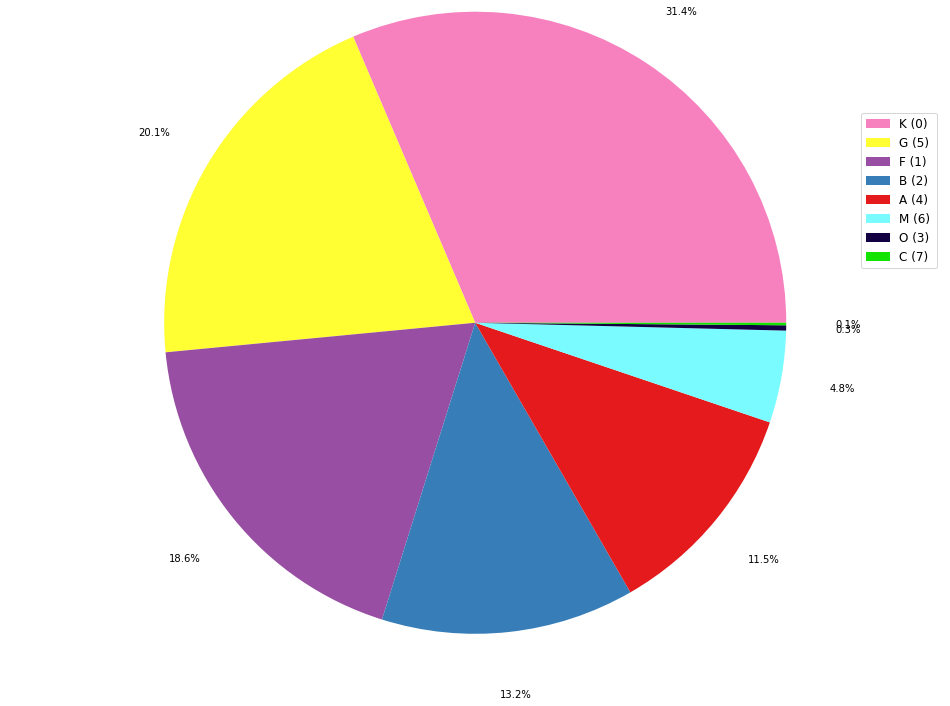

In [8]:
PieLabel = 'K (0)','G (5)','F (1)','B (2)','A (4)','M (6)','O (3)','C (7) '
Piecolors=['#F781BF','#FFFF33','#984EA3','#377EB8','#E41A1C','#7afbff','#120042','#13e300'] 


fig2 = plt.figure(figsize=(13, 6))
ax3 = fig2.add_axes([0,0,1,1])
ax3.axis('equal')
ax3.pie(Sum_Type, labels=PieLabel, colors=Piecolors, labeldistance=None, radius=1.8, autopct='%1.1f%%', pctdistance=1.20)
ax3.legend(loc='upper right', fontsize='large')
plt.show()

In [9]:
data_new.dropna(subset = ["NumSpType"], inplace=True)

In [10]:
data_new

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass,NumSpType
0,10.00,31.66,6.19,1.213,K,22.502556,1,0.0
1,8.26,3.21,1.00,1.130,K,15.792525,0,0.0
2,8.27,12.75,1.06,0.596,F,18.797552,1,1.0
3,6.54,5.23,0.76,1.189,K,15.132508,0,0.0
4,8.52,0.96,0.72,0.173,B,13.431356,1,2.0
...,...,...,...,...,...,...,...,...
39547,5.83,0.17,0.52,0.474,B,6.982245,0,2.0
39548,7.05,18.12,0.92,0.424,F,18.340790,1,1.0
39549,9.21,3.89,1.46,0.227,A,17.159748,1,4.0
39550,9.01,2.13,1.46,1.467,M,15.651898,0,6.0


In [12]:
X = data_new[['Vmag','Plx','B-V','Amag']]
y = data_new.NumSpType

In [13]:
X

,Vmag,Plx,B-V,Amag
0,10.00,31.66,1.213,22.502556
1,8.26,3.21,1.130,15.792525
2,8.27,12.75,0.596,18.797552
3,6.54,5.23,1.189,15.132508
4,8.52,0.96,0.173,13.431356
...,...,...,...,...
39547,5.83,0.17,0.474,6.982245
39548,7.05,18.12,0.424,18.340790
39549,9.21,3.89,0.227,17.159748
39550,9.01,2.13,1.467,15.651898


In [14]:
y

0        0.0
1        0.0
2        1.0
3        0.0
4        2.0
        ... 
39547    2.0
39548    1.0
39549    4.0
39550    6.0
39551    1.0
Name: NumSpType, Length: 39541, dtype: float64

In [15]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
#print(clf.fit(X_train, y_train))

In [16]:
#clf.feature_importances_

In [17]:
#clf.score(X_train,y_train)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10, random_state=42)
rfc.fit(X,y)

RandomForestClassifier(max_depth=10, random_state=42)

In [19]:
print(rfc.feature_importances_)

[0.0337613  0.06733556 0.74322979 0.15567335]


In [20]:
from sklearn.feature_selection import SelectKBest, f_classif
select = SelectKBest(f_classif, k=2)
select.fit(X, y)

SelectKBest(k=2)

In [21]:
mask = select.get_support()
print(mask)

[False False  True  True]


In [22]:
new_X = data_new[['B-V','Amag']]
new_Y = data_new.NumSpType
df_new = pd.DataFrame(new_X)
df_new

,B-V,Amag
0,1.213,22.502556
1,1.130,15.792525
2,0.596,18.797552
3,1.189,15.132508
4,0.173,13.431356
...,...,...
39547,0.474,6.982245
39548,0.424,18.340790
39549,0.227,17.159748
39550,1.467,15.651898


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, new_Y, test_size=0.33, random_state=42)
print(rfc.fit(X_train, y_train))

RandomForestClassifier(max_depth=10, random_state=42)


In [39]:
rfc.score(X_train,y_train)

0.8237203684131058

In [40]:
predict=rfc.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, predict)
print('Accuracy: %.3f' % acc)

Accuracy: 0.788


In [53]:
#If given input of two values ["B-V","Amag"], the random forest classifier will predict the belonging 
#class of the star.
input = [[0.62, 19.234]]
in_prediction = rfc.predict(input)

if in_prediction = 5.0:
    in_prediction = 'G'

print(input, in_prediction)

SyntaxError: invalid syntax (2040733770.py, line 6)

In [23]:
kmeans = KMeans(n_clusters=8, random_state=10).fit(df_new)
clusters = kmeans.cluster_centers_
clusters

array([[ 0.74504454,  7.97689243],
       [ 0.55505466, 17.18730001],
       [ 0.03801737, 14.32923823],
       [ 0.91195208, 21.22992648],
       [ 1.35009676, 14.28121259],
       [ 0.76313421, 11.90164417],
       [ 0.57919487, 18.81328835],
       [ 0.86206584, 15.82378557]])

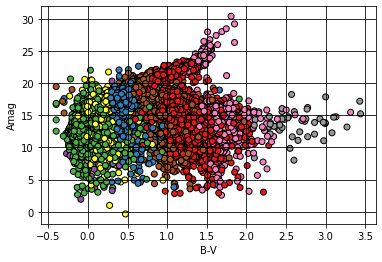

In [24]:
plt.rc('grid', linestyle="-", color='black')
plt.scatter(df_new.iloc[:, 0], df_new.iloc[:, 1], c=new_Y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('B-V')
plt.ylabel('Amag')

 


plt.xlabel('B-V')
plt.ylabel('Amag')
plt.grid(True)
plt.show()

In [25]:
X_arr=df_new.to_numpy()
X_arr

array([[ 1.213   , 22.502556],
       [ 1.13    , 15.792525],
       [ 0.596   , 18.797552],
       ...,
       [ 0.227   , 17.159748],
       [ 1.467   , 15.651898],
       [ 0.48    , 17.030317]])

In [26]:
Y_arr = new_Y.to_numpy()
Y_arr

array([0., 0., 1., ..., 4., 6., 1.])

In [27]:
Y_arr=Y_arr.astype(np.int32)

In [28]:
Y_arr

array([0, 0, 1, ..., 4, 6, 1], dtype=int32)

In [29]:
pairs = {}
predicted = []
for i in range(len(X_arr)):
    predicted_class = kmeans.predict([X_arr[i]])[0]
    original_class = Y_arr[i]
    #print([X[i]], predicted_class, original_class)
    predicted.append((X_arr[i], predicted_class))
    pair = (predicted_class, original_class)
    pairs[pair] = pairs.get(pair, 0)
    pairs[pair] += 1
    

for pair in pairs:
    print(pair, pairs[pair])

(3, 0) 864
(7, 0) 5444
(6, 1) 3202
(2, 2) 2569
(1, 0) 1408
(5, 2) 959
(6, 5) 2775
(1, 1) 3139
(7, 2) 1021
(1, 4) 1884
(1, 5) 1078
(4, 0) 3441
(4, 5) 873
(0, 4) 59
(4, 6) 1117
(7, 5) 2280
(7, 4) 1562
(7, 6) 306
(7, 1) 615
(5, 1) 159
(3, 5) 561
(4, 1) 59
(3, 1) 20
(5, 5) 294
(2, 4) 712
(1, 2) 358
(5, 0) 800
(6, 0) 278
(6, 4) 137
(5, 3) 36
(0, 2) 246
(7, 3) 15
(2, 0) 8
(0, 0) 180
(2, 1) 124
(0, 1) 52
(6, 2) 25
(4, 2) 21
(3, 6) 126
(0, 6) 62
(5, 6) 239
(5, 4) 178
(7, 7) 6
(4, 7) 25
(2, 5) 18
(1, 6) 36
(3, 2) 4
(3, 4) 4
(0, 5) 68
(4, 4) 10
(2, 3) 25
(5, 7) 10
(6, 6) 7
(0, 3) 25
(1, 3) 5
(0, 7) 4
(6, 7) 3
(1, 7) 2
(2, 7) 1
(4, 3) 1
(3, 3) 1


In [30]:
clusters

array([[ 0.74504454,  7.97689243],
       [ 0.55505466, 17.18730001],
       [ 0.03801737, 14.32923823],
       [ 0.91195208, 21.22992648],
       [ 1.35009676, 14.28121259],
       [ 0.76313421, 11.90164417],
       [ 0.57919487, 18.81328835],
       [ 0.86206584, 15.82378557]])

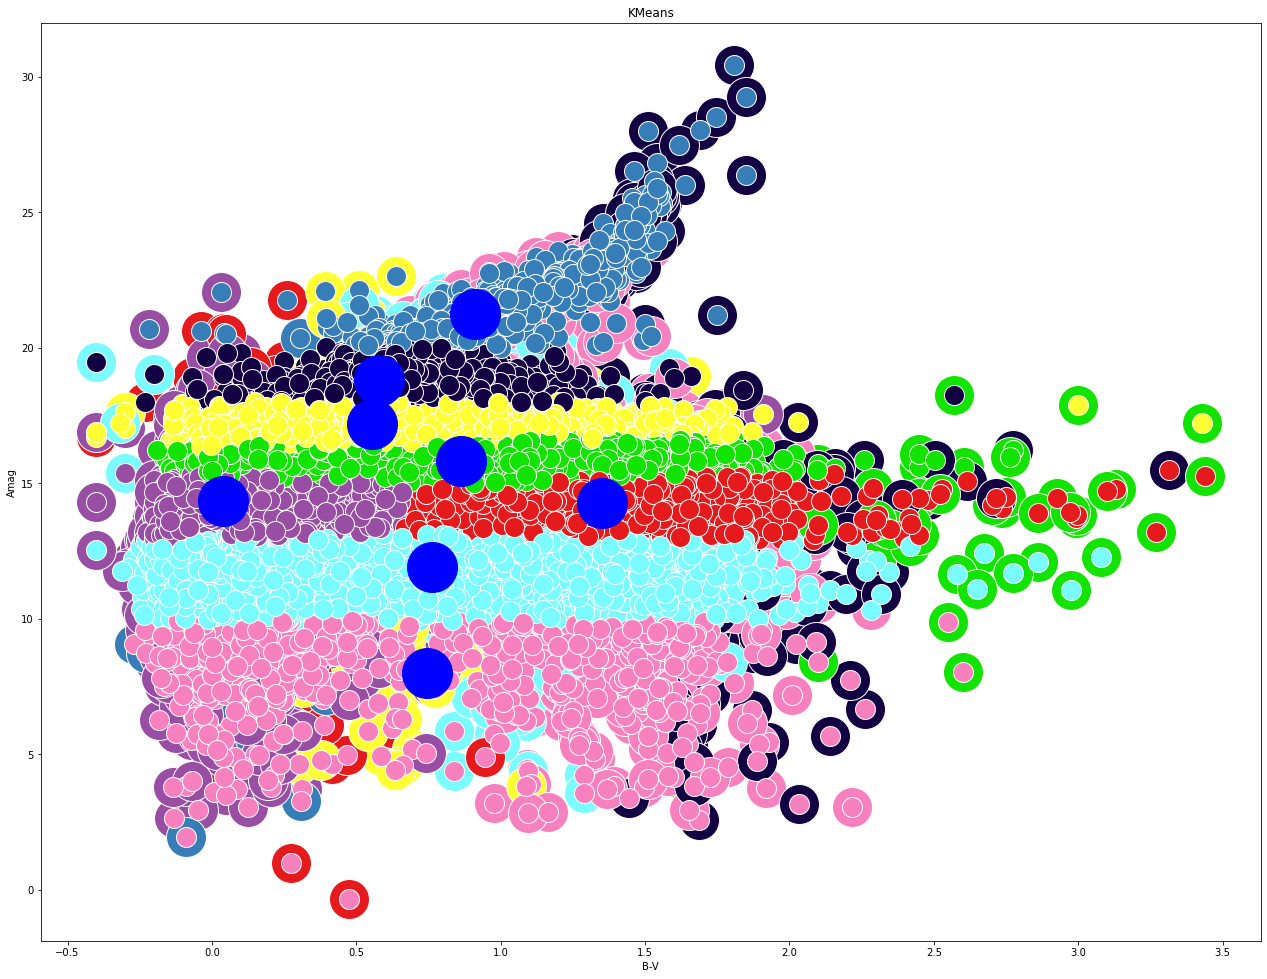

In [31]:
fig = plt.figure(figsize=(60, 15))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors=['#F781BF','#FFFF33','#984EA3','#377EB8','#E41A1C','#7afbff','#120042','#13e300'] 
ax = fig.add_subplot(1, 3, 1)
ax.set_title('KMeans')
ax.set_xlabel('B-V')
ax.set_ylabel('Amag')

for i in range(len(X_arr)):
    c = colors[Y_arr[i]] 
    # plot original data
    ax.plot(X_arr[i][0], X_arr[i][1], 'w',
            markerfacecolor=c, marker='o', markersize=40)  # original data
    # plot estimate data

for elem in predicted:
    x_elem, y_elem = elem[0]

    if elem[1] == 0:
        c = colors[0]
    elif elem[1] == 1:
        c = colors[1]
    elif elem[1] == 2:
        c = colors[2]
    elif elem[1] == 3:
        c = colors[3]
    elif elem[1] == 4:
        c = colors[4]
    elif elem[1] == 5:
        c = colors[5]
    elif elem[1] == 6:
        c = colors[6]
    elif elem[1] == 7:
        c = colors[7]
    else:
        c = "gray"
    
    ax.plot(x_elem, y_elem, 'w',
           markerfacecolor=c, marker='o', markersize=20)   # predicted data
    
# cluster centers
ax.plot(clusters[0][0],clusters[0][1],'bo',markersize=50) 
ax.plot(clusters[1][0],clusters[1][1],'bo',markersize=50) 
ax.plot(clusters[2][0],clusters[2][1],'bo',markersize=50)
ax.plot(clusters[3][0],clusters[3][1],'bo',markersize=50) 
ax.plot(clusters[4][0],clusters[4][1],'bo',markersize=50) 
ax.plot(clusters[5][0],clusters[5][1],'bo',markersize=50)
ax.plot(clusters[6][0],clusters[6][1],'bo',markersize=50) 
ax.plot(clusters[7][0],clusters[7][1],'bo',markersize=50) 